In [1]:
import matplotlib.pyplot as plt
import json
import statistics
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def plot_results(accuracies, error_df, y_error, save=False, filename='accuracies'):
    y_labels = ['Test Accuracy', 'Training Accuracy']
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    for i in range(2):
        axes[0, i].plot([1, 2, 3, 4, 5, 6, 7], accuracies[i][0], label='rf', marker='o', linestyle='-')
        axes[0, i].plot([1, 2, 3, 4, 5, 6, 7], accuracies[i][1], label='svmrad', marker='s', linestyle=(0, (1, 1)))
        axes[0, i].plot([1, 2, 3, 4, 5, 6, 7], accuracies[i][2], label='svmlin', marker='X', linestyle=(0, (3, 1, 1, 1, 1, 1)))
        axes[0, i].set_xticks([1, 2, 3, 4 , 5, 6, 7])
        axes[0, i].set_xticklabels(['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7'])
        axes[0, i].set_ylabel(y_labels[i])
        axes[0, i].set_xlabel('k-mer')
        axes[0, i].legend(loc='lower right')
    for i in range(2):
        sns.boxplot(x='k-mer', y=y_error[i], data=error_df[i], hue='model', ax=axes[1, i])
        axes[1, i].legend(loc='lower right')
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [3]:
def get_accuracy(data):
    mean_accs = {}
    for k in sorted(data):
        for model in data[k]: 
            mean_accs.setdefault(model, [])
            mean_accs[model].append(statistics.mean(data[k][model]) * 100)
    return mean_accs

In [4]:
def get_errors(data):
    error_scores = {}
    for k in data:
        for model in data[k]: 
            error_scores.setdefault(model, {})
            error_scores[model].setdefault(k, 0)
            error_scores[model][k] = data[k][model]
    return error_scores

In [5]:
def prepare_df(json):
    df_train = pd.DataFrame(columns=['Training Accuracy', 'model', 'k-mer'])
    df_test = pd.DataFrame(columns=['Test Accuracy', 'model', 'k-mer'])
    for model in json:
        if 'train' in model:
            for k in sorted(json[model]):
                for score in json[model][k]:
                    df_train.loc[len(df_train)] = [score*100, model, 'k=' + k[-1]]
        else:
            for k in sorted(json[model]):
                for score in json[model][k]:
                    df_test.loc[len(df_test)] = [score*100, model, 'k=' + k[-1]]
    return df_train, df_test

In [6]:
with open('non-hierarchical acc score.json', 'r') as fr:
    data = json.load(fr)
    chirop_results = get_accuracy(data['Chiroptera'])
    rodent_results = get_accuracy(data['Rodentia'])
    aves_results = get_accuracy(data['Aves'])
    chirop_error = get_errors(data['Chiroptera'])
    rodent_error = get_errors(data['Rodentia'])
    aves_error = get_errors(data['Aves'])

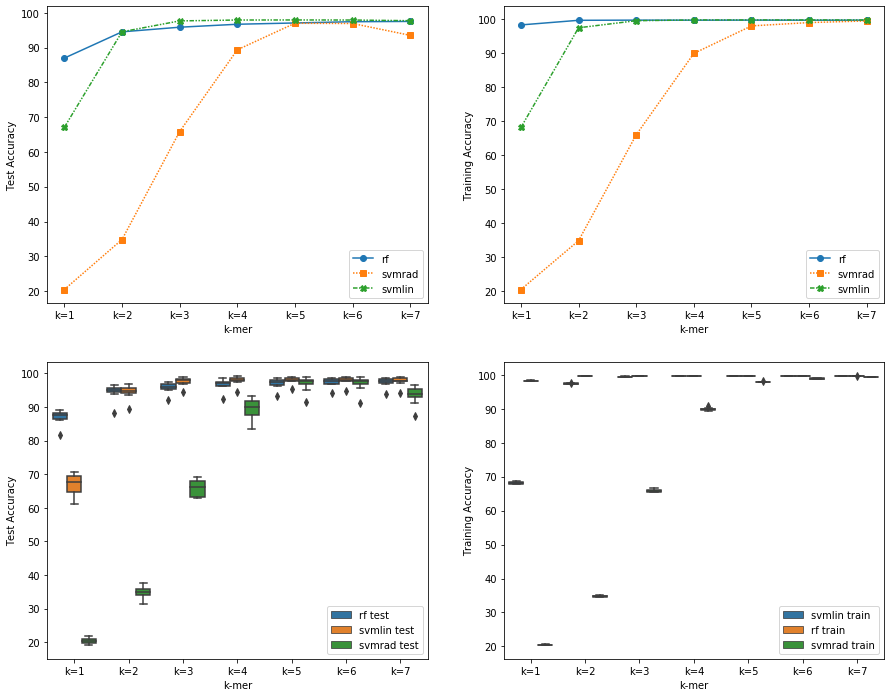

In [7]:
train, test = prepare_df(chirop_error)
acc_list = [[chirop_results['rf test'], chirop_results['svmrad test'], chirop_results['svmlin test']],
            [chirop_results['rf train'], chirop_results['svmrad train'], chirop_results['svmlin train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'chiroptera - accs')

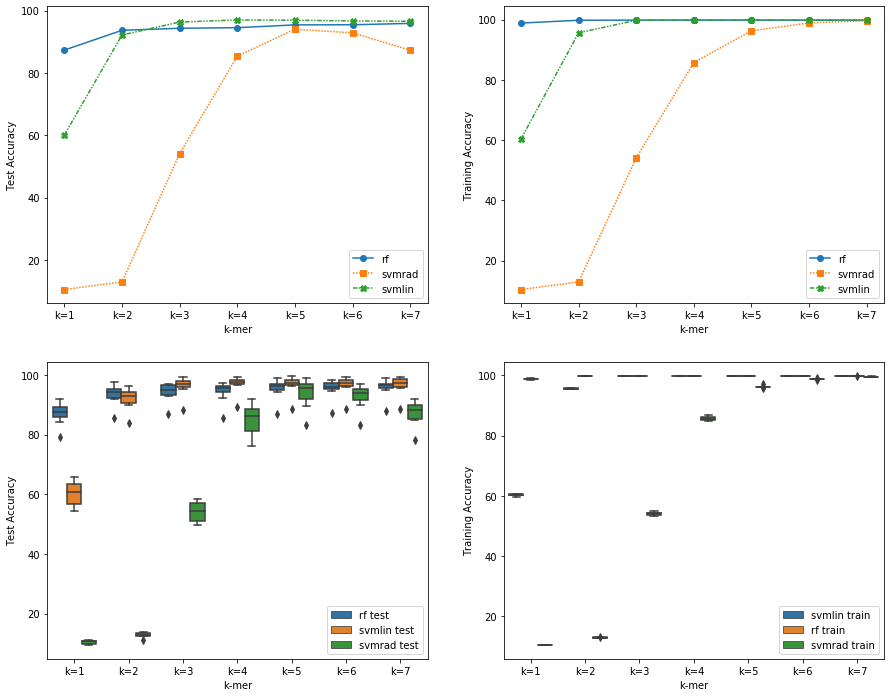

In [8]:
train, test = prepare_df(rodent_error)
acc_list = [[rodent_results['rf test'], rodent_results['svmrad test'], rodent_results['svmlin test']],
            [rodent_results['rf train'], rodent_results['svmrad train'], rodent_results['svmlin train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'rodentia - accs')

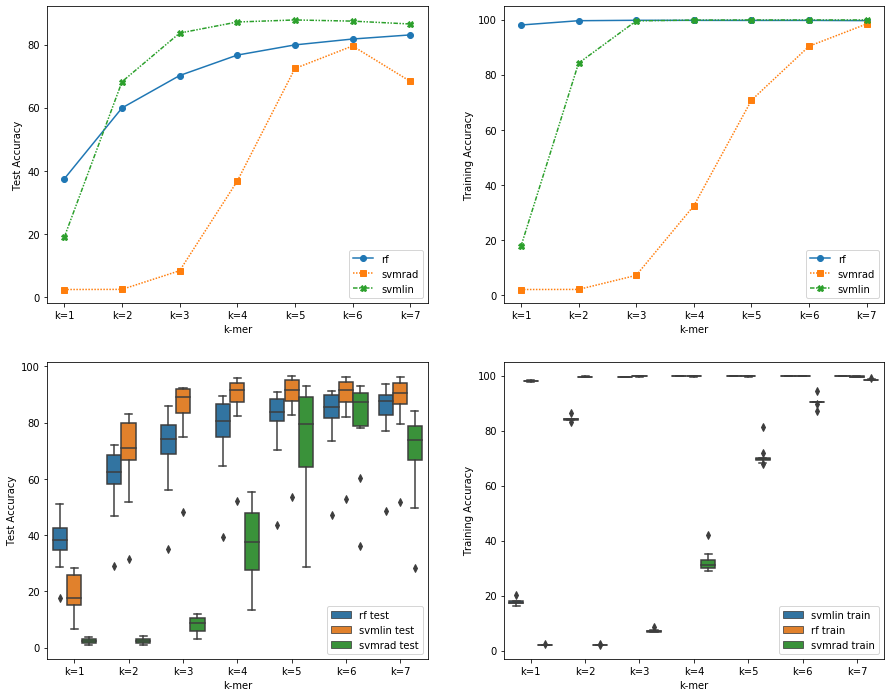

In [9]:
train, test = prepare_df(aves_error)
acc_list = [[aves_results['rf test'], aves_results['svmrad test'], aves_results['svmlin test']],
            [aves_results['rf train'], aves_results['svmrad train'], aves_results['svmlin train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'aves - accs')

In [10]:
with open('hierarchical class acc.json', 'r') as fr:
    data = json.load(fr)
    class_acc = get_accuracy(data)
    class_error = get_errors(data)

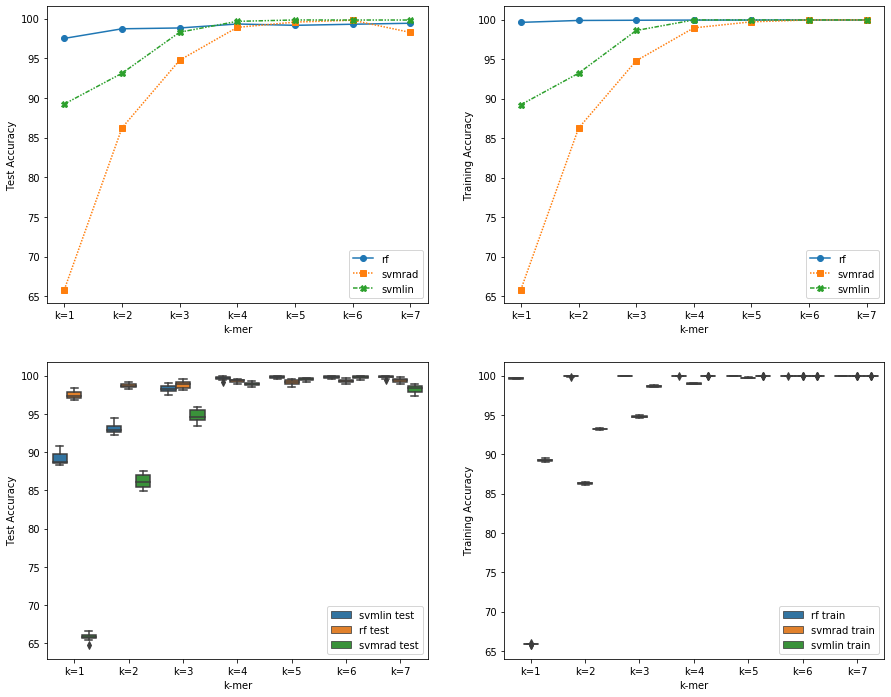

In [11]:
train, test = prepare_df(class_error)
acc_list = [[class_acc['rf test'], class_acc['svmrad test'], class_acc['svmlin test']],
            [class_acc['rf train'], class_acc['svmrad train'], class_acc['svmlin train']]]
plot_results(acc_list, [test, train], ['Test Accuracy', 'Training Accuracy'], True, 'taxonomic class - merged dataset')

In [12]:
with open('non hierarchical merged.json', 'r') as fr:
    data = json.load(fr)
    merged_data = get_accuracy(data)
    merged_data_error = get_errors(data)

In [13]:
def plot_merged_data(train_df, test_df):
    fig, axes = plt.subplots(1, 3, figsize=(22, 7))
    axes[0].plot([1, 2, 3, 4, 5, 6, 7], merged_data['rf train'], label='training', marker='o', linestyle='-')
    axes[0].plot([1, 2, 3, 4, 5, 6, 7], merged_data['rf test'], label='test', marker='s', linestyle=(0, (1, 1)))
    axes[0].set_xticks([1, 2, 3, 4 , 5, 6, 7])
    axes[0].set_xticklabels(['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7'])
    axes[0].set_ylabel('Test and Training Accuracies')
    axes[0].legend()
    sns.boxplot(x='k-mer', y='Training Accuracy', data=train_df, hue='model', ax=axes[1])
    axes[1].legend(loc='lower right')
    sns.boxplot(x='k-mer', y='Test Accuracy', data=test_df, hue='model', ax=axes[2])
    axes[2].legend(loc='lower right')
    plt.savefig('merged data rf acc', bbox_inches='tight', dpi=300)
    plt.show()

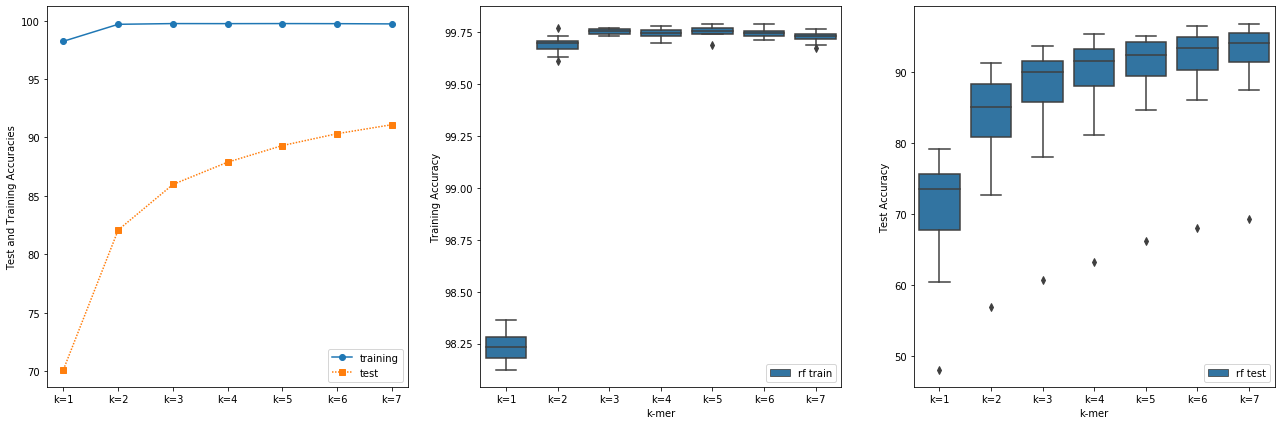

In [14]:
train, test = prepare_df(merged_data_error)
plot_merged_data(train, test)